Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.

In [1]:
import pandas as pd
#import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("GlobalTerrorism.csv",encoding='ISO-8859-1',low_memory=False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.tail(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [5]:
data.shape

(181691, 135)

In [6]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country':'country1','country_txt':'Country','region':'Region1','region_txt':'Region','attacktype1':'attacktype1','attacktype1_txt':'AttackType',
                     'target1':'Target','nkill':'Killed','nwound':'Wounded',
                     'summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
terror=data[['Year','Month','Day','Country','country1','Region','Region1', 'city','AttackType','attacktype1','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror

,Year,Month,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,Santo Domingo,Assassination,1,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,130,North America,1,Mexico city,Hostage Taking (Kidnapping),6,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,160,Southeast Asia,5,Unknown,Assassination,1,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,78,Western Europe,8,Athens,Bombing/Explosion,3,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,101,East Asia,4,Fukouka,Facility/Infrastructure Attack,7,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,182,Sub-Saharan Africa,11,Ceelka Geelow,Armed Assault,2,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,200,Middle East & North Africa,10,Jableh,Bombing/Explosion,3,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,160,Southeast Asia,5,Kubentog,Facility/Infrastructure Attack,7,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,92,South Asia,6,Imphal,Bombing/Explosion,3,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


In [8]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   country1     181691 non-null  int64  
 5   Region       181691 non-null  object 
 6   Region1      181691 non-null  int64  
 7   city         181257 non-null  object 
 8   AttackType   181691 non-null  object 
 9   attacktype1  181691 non-null  int64  
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(2), int64(6),

In [9]:
terror['Day'].apply(np.floor)
terror['Month'].apply(np.floor)
terror['Killed'].apply(np.floor)
terror['Day'].apply(np.floor)
#I realized there are a couple of decimal numbers in the Day column. Then I fixed like this.

0          2.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
181686    31.0
181687    31.0
181688    31.0
181689    31.0
181690    31.0
Name: Day, Length: 181691, dtype: float64

In [10]:
terror.describe(include=['O'])

,Country,Region,city,AttackType,Target,Summary,Group,Target_type,Weapon_type,Motive
count,181691,181691,181257,181691,181055,115562,181691,181691,181691,50561
unique,205,12,36674,9,86006,112492,3537,22,12,14490
top,Iraq,Middle East & North Africa,Unknown,Bombing/Explosion,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,24636,50474,9775,88255,6461,100,82782,43511,92426,14889


In [11]:
#replacing dtypes with correct ones.
terror['attacktype1'] = pd.Categorical(terror.attacktype1)
terror['Region1'] = pd.Categorical(terror.Region1)
terror['country1'] = pd.Categorical(terror.country1)
terror['Country'] = pd.Categorical(terror.Country)
terror['Region'] = pd.Categorical(terror.Region)
terror['city'] = pd.Categorical(terror.city)
terror['AttackType'] = pd.Categorical(terror.AttackType)
terror['Group'] = pd.Categorical(terror.Group)
terror['Target_type'] = pd.Categorical(terror.Target_type)
terror['Weapon_type'] = pd.Categorical(terror.Weapon_type)

In [12]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Year         181691 non-null  int64   
 1   Month        181691 non-null  int64   
 2   Day          181691 non-null  int64   
 3   Country      181691 non-null  category
 4   country1     181691 non-null  category
 5   Region       181691 non-null  category
 6   Region1      181691 non-null  category
 7   city         181257 non-null  category
 8   AttackType   181691 non-null  category
 9   attacktype1  181691 non-null  category
 10  Killed       171378 non-null  float64 
 11  Wounded      165380 non-null  float64 
 12  Target       181055 non-null  object  
 13  Summary      115562 non-null  object  
 14  Group        181691 non-null  category
 15  Target_type  181691 non-null  category
 16  Weapon_type  181691 non-null  category
 17  Motive       50561 non-null   object  
dtypes: c

In [13]:
terror.describe()

,Year,Month,Day,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,2.403272,3.167668
std,13.259430,3.388303,8.814045,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000


In [14]:
terror.groupby(by='Month').agg(['count'])

,Year,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
Month,,,,,,,,,,,,,,,,,
0,20,20,20,20,20,20,20,20,20,9,9,19,0,20,20,20,0
1,14936,14936,14936,14936,14936,14936,14907,14936,14936,14014,13512,14838,9569,14936,14936,14936,4353
2,13879,13879,13879,13879,13879,13879,13855,13879,13879,13151,12658,13808,8797,13879,13879,13879,3705
3,15257,15257,15257,15257,15257,15257,15222,15257,15257,14189,13744,15154,9356,15257,15257,15257,3899
4,15152,15152,15152,15152,15152,15152,15122,15152,15152,14252,13737,15117,9814,15152,15152,15152,4478
5,16875,16875,16875,16875,16875,16875,16834,16875,16875,15819,15167,16800,10791,16875,16875,16875,4481
6,15359,15359,15359,15359,15359,15359,15314,15359,15359,14564,14017,15309,9902,15359,15359,15359,4370
7,16268,16268,16268,16268,16268,16268,16228,16268,16268,15397,14876,16238,10513,16268,16268,16268,4672


In [15]:
terror['Day'] = terror['Day'].apply(lambda x: np.random.randint(1,32) if x == 0 else x)
terror['Month'] = terror['Month'].apply(lambda x: np.random.randint(1,13) if x == 0 else x)


In [16]:
a = terror.groupby(by='Day').agg(['count'])
b = a['Year']
b.columns = ['count']
b = b.reset_index()
b.head(3)

,Day,count
0,1,6373
1,2,5997
2,3,6039


In [21]:
terror['date'] = pd.to_datetime(terror[['Year','Month','Day']],errors='coerce')
terror['date'] = pd.to_datetime(terror['date'])
terror['day_of_week'] = terror['date'].dt.day_name()
terror.head(2)

,Year,Month,Day,Country,country1,Region,Region1,city,AttackType,attacktype1,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,date,day_of_week
0,1970,7,2,Dominican Republic,58,Central America & Caribbean,2,Santo Domingo,Assassination,1,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1970-07-02,Thursday
1,1970,8,28,Mexico,130,North America,1,Mexico city,Hostage Taking (Kidnapping),6,0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1970-08-28,Friday


In [22]:
display(terror.isnull().sum().sort_values(ascending=False))

Motive         131130
Summary         66129
Wounded         16311
Killed          10313
Target            636
city              434
day_of_week        10
date               10
Region              0
Month               0
Day                 0
Country             0
country1            0
attacktype1         0
Region1             0
AttackType          0
Group               0
Target_type         0
Weapon_type         0
Year                0
dtype: int64

In [29]:
def missing_values_(terror):
    missing_values_ = terror.isnull().sum()
    missing_values_percent = 100*terror.isnull().sum()/len(terror)
    missing_values_ = pd.concat([missing_values_,missing_values_percent],axis=1)
    missing_values_last = missing_values_.rename(
    columns ={0:'Missing Values',1:'%'})
    return missing_values_last
missing_values_(terror)

,Missing Values,%
Year,0,0.000000
Month,0,0.000000
Day,0,0.000000
Country,0,0.000000
country1,0,0.000000
Region,0,0.000000
Region1,0,0.000000
city,434,0.238867
AttackType,0,0.000000
attacktype1,0,0.000000


Text(0.5, 1.0, 'Correlation Matrix (Data)')

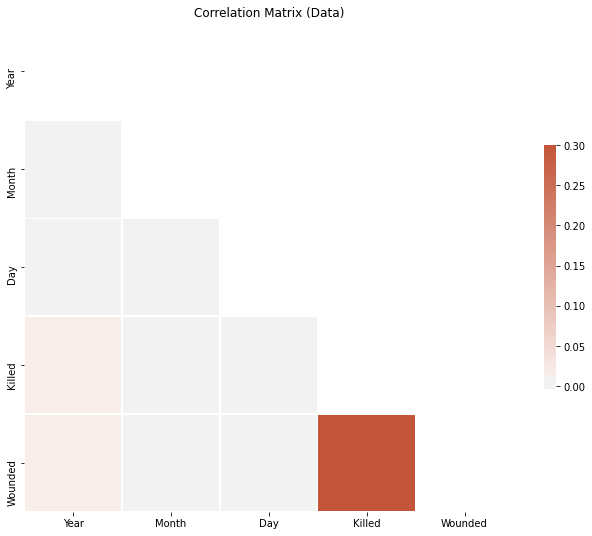

In [31]:
a = terror.corr()
mask = np.triu(np.ones_like(a, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(a, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix (Data)")

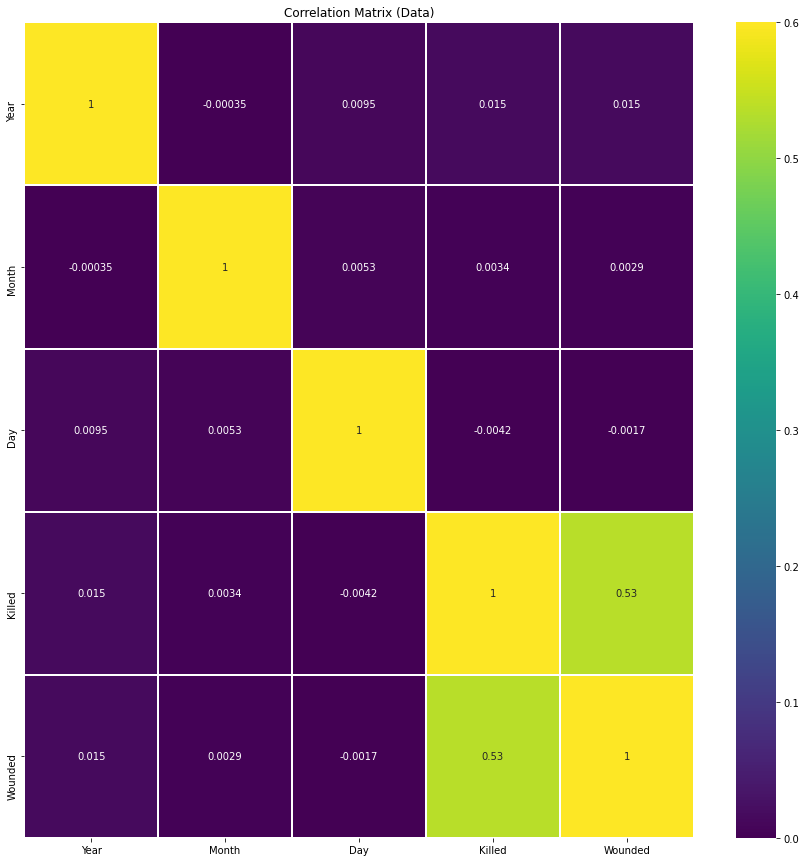

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(a, annot=True, annot_kws={"size": 10}, linewidths=1, vmin=0, vmax=0.6, cmap='viridis')
plt.title("Correlation Matrix (Data)")
plt.show() #let's make it clear.

In [33]:
k_by_year_1 = terror.groupby('Year')['Killed'].sum().reset_index()
k_by_year_1 = k_by_year_1.set_index('Year')
k_by_year_1.columns = ['Killed']
k_by_year_1 = k_by_year_1.reset_index()
Total = k_by_year_1['Killed'].sum()
k_by_year_1['Ratio'] = k_by_year_1['Killed']/ Total
k_by_year_1 #It's the long way I know but I did like this though. Not Pythonic that much.


,Year,Killed,Ratio
0,1970,174.0,0.000422
1,1971,173.0,0.000420
2,1972,566.0,0.001374
3,1973,370.0,0.000898
4,1974,539.0,0.001309
5,1975,617.0,0.001498
6,1976,674.0,0.001636
7,1977,456.0,0.001107
8,1978,1459.0,0.003542
9,1979,2100.0,0.005099


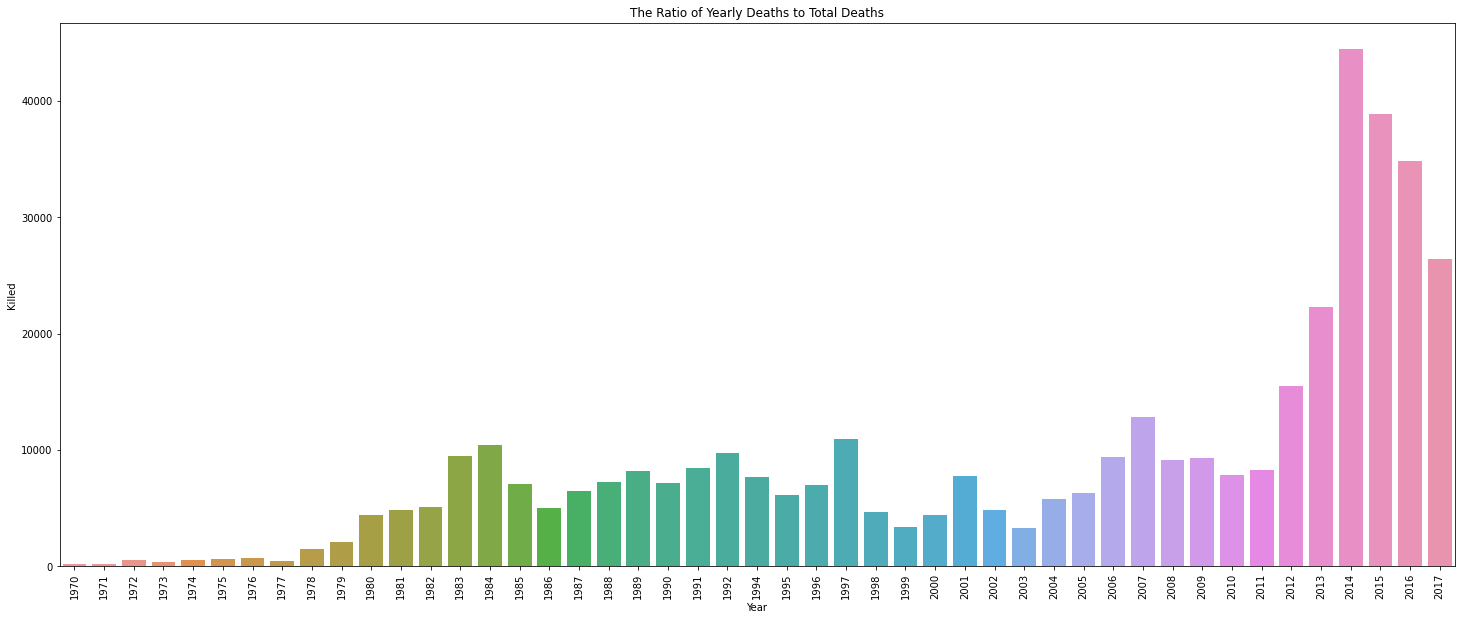

In [34]:
plt.figure(figsize=(25, 10))
sns.barplot(x = 'Year', y = 'Killed', data = k_by_year_1)
plt.title("The Ratio of Yearly Deaths to Total Deaths")
plt.xticks(rotation=90)
plt.show() #but it works right. <3